# Explore here

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.model_selection import train_test_split
import pickle

### Exploración y limpieza de datos


In [3]:
pd.set_option('display.max_columns', None)
data = pd.read_csv('/Users/julian/Desktop/vs code/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/Linear_regression_model_for_machine_learning_Project_14_Julian_Lopez/data/raw/medical_insurance_cost.csv', sep = ',')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
# Obtener las dimensiones.
data.shape

(1338, 7)

In [5]:
# Obtener información sobre tipos de datos y valores no nulos.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Como podemos obserbar, el data set no cuenta con valores nulos.

#### Eliminar duplicados

In [6]:
# Verificar si hay duplicados y eliminarlos si los hubiese.
data.duplicated().sum()

np.int64(1)

Nos encontramos con que hay 1 fila duplicada y pasamos a eliminarla para convertir el data set en un data set sin duplicados

In [7]:
# Eliminar duplicados. 

data_sin_duplicados = data.drop_duplicates(subset = data.columns)

data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


#### Eliminar columnas sin relevancia

In [8]:
# #Eliminar columnas.

# data_limpia = data_sin_duplicados.drop(['month', 'day_of_week'], axis = 1, inplace = False)
# data_limpia.head()

data_limpia = data_sin_duplicados
data_limpia.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Tambien eliminamos las columnas que consideramos que no tienen relacion con el problema. En este caso en particular no encontramos columnas sin relación. 

### Paso 3: Análisis de variables univariante

#### Análisis sobre variables categóricas

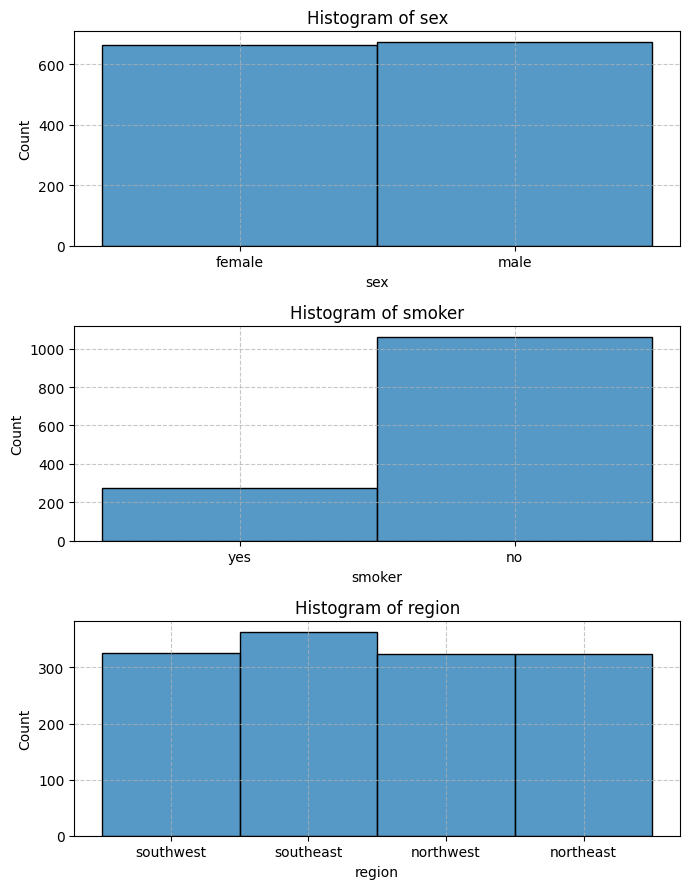

In [9]:
categoricals_variables = ['sex', 'smoker', 'region']
    

def plot_categoricas(data_set, variables_categoricas):
    
    # Crear la figura con 1 columna y n filas, donde n es el número de variables categóricas.
    fig, axis = plt.subplots(len(variables_categoricas), 1, figsize=(7, len(variables_categoricas) * 3))

    # Iterar sobre cada columna categórica del DataFrame
    for i, col in enumerate(variables_categoricas):
        # Crear histograma para cada columna categórica.
        sns.histplot(ax = axis[i], data = data_set, x = col) 
        axis[i].set_title(f'Histogram of {col}')
        axis[i].grid(linestyle='--', alpha=0.7)
        
        # Rotación automática de las etiquetas del eje X si es necesario.

        category_counts = data_set[col].value_counts() # Contar las categorías en la columna.
        
        if len(category_counts) > 20: # Si hay más de 20 categorías, eliminar las etiquetas del eje X
            axis[i].set_xticklabels([])
        elif len(category_counts) >= 8:
            for label in axis[i].get_xticklabels(): # Si hay más de 10 categorías pero menos de 20, rotar las etiquetas del eje X
                label.set_rotation(50)

    plt.tight_layout()
    plt.show()

plot_categoricas(data_limpia, categoricals_variables)

**Análisis de las variables categoricas**

- **Sex**: Hay practicamente el mismo numero de mujeres que de hombres en el data set.
- **Smoker**: De esas personas la gran mayoria no son fumadores.(Menos de 300 personas son fumadoras, contra mas de 1000 que no lo son).
- **Region**: el data set esta dividido en 4 regiones y las personas del data set en cada uno de ellos cuatro de manera practicamnte equitativa. (Casi el mismo numero de personas en cada region). 


#### Análisis sobre variables numéricas

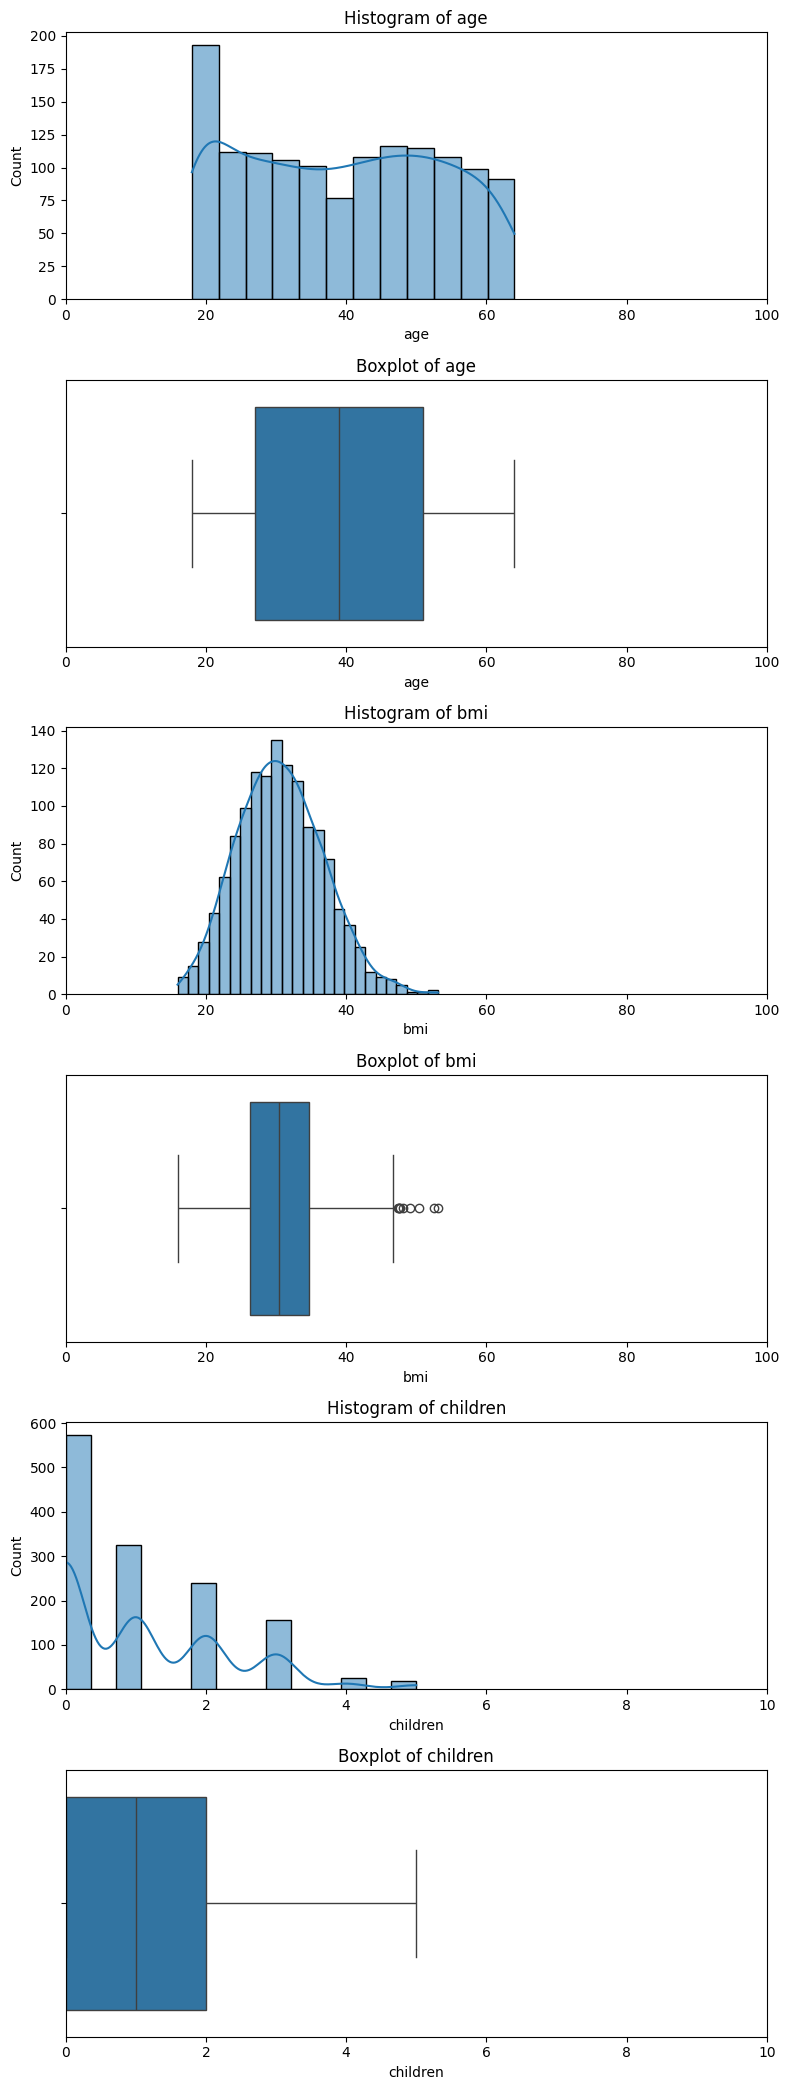

In [12]:
numericals_variables = ['age', 'bmi', 'children']

def plot_numericas(data_set, variables_numericas):
    
    # Crear la figura con 1 columnas y 2 filas por variable.
    fig, axis = plt.subplots(len(variables_numericas) * 2, 1, figsize=(8, len(variables_numericas) * 7))

    # Definir límites de los ejes x para cada par de gráficos (histograma y boxplot).
    # RECORDAR CAMBIAR LOS NOMBRES Y PONER LOS DE LAS COLUMNAS DE DF CORRESPONDIENTE.
    x_limits = {
        'age': (0, 100),   # Rango para el histograma y el boxplot de columna1...
        'bmi': (0, 100),    
        'children': (0, 10), 
        
        # Añadir más columnas y rangos si es necesario...
    }

    # Iterar sobre cada columna del DataFrame
    for i, col in enumerate(variables_numericas):
        index = i * 2
        # Histograma en la primera fila
        sns.histplot(data = data_set, x = col, kde = True, ax = axis[index])
        axis[index].set_title(f'Histogram of {col}')
        
        # Establecer límites del eje x para el histograma
        if col in x_limits:
            axis[index].set_xlim(x_limits[col])  # Asigna el rango de valores personalizado al histograma

        # Boxplot en la segunda fila
        sns.boxplot(data = data_set, x = col, ax = axis[index + 1])
        axis[index + 1].set_title(f'Boxplot of {col}')
        
        # Establecer límites del eje x para el boxplot (mismo rango que el histograma)
        if col in x_limits:
            axis[index + 1].set_xlim(x_limits[col])  # Asigna el mismo rango de valores al boxplot

    plt.tight_layout()
    plt.show()

plot_numericas(data_limpia, numericals_variables)

**Análisis de las variables numéricas**

- **Age**: En la variable de la edad, como era de esperar, encontramos una distribucion normal pero cesgada hacia el lado izquierdo donde se encuentran los clientes mas jovenes estando entre los 35 y los 45 años el auge de la contratacion de este servicio. 
- **Duration**: En cuanto a la duracion del contacto previo podemos ver que las llamadas van desde los 0 y 10 min siendo lo más normal llamadas cortas de unos 5 min.
- **Pdays**: Pasaron 1000 dias entre una campaña y otra.  
- **emp.var.rate, cons.price.idx,cons.conf.idx**: Son variables que se mantienen estables y en constante crecimineto. 
- **cons.conf.idx**: Vemos como el indice de confianza del cliente va en aumento. 
- **euribor3m, nr.employed**: Podemos observar como el euribor y el numero de empleados crecen a la par. 

### Paso 4: Análisis de variables multivariante

#### Análisis numérico-numérico